# Увеличение датасета.

## Описание ноутбука

- На входе мы имеем набор изображений текста произвольной ориентации.  
- Каждое изображение помещаем в папку с соответствующей ориентацией, добавляем в название файла угол поворота (повороты документа на 0, 90, 180, 270). Исходное изображение поворачиваем 3 раза на 90 градусов и каждый раз сохраняем в папку с соответствующей ориентацией.
- На выходе получаем 4 папки с разной ориентацией изображений.

## Функця для поворотов изображения

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import glob
import os

from pathlib import Path

In [2]:
def from_path_to_rotations(img_path, angle_list):
    img = cv2.imread(img_path)
    cv2_rotations = {
        90 : cv2.ROTATE_90_CLOCKWISE,
        180 : cv2.ROTATE_180,
        270 : cv2.ROTATE_90_COUNTERCLOCKWISE
    }
    image_list = [img]
    for angle in angle_list[1:]:
        image_list.append(cv2.rotate(img, cv2_rotations[angle]))
    return image_list # список из 4 ориентаций исходного изображения

Напишем функцию для распознавания текста

Проверим работу функций вручную

In [7]:
img_path = 'images/448___270ec991cd3b4652a7558d992084b4ec.png'

angle_list = [0, 90, 180, 270]

In [8]:
image_list = from_path_to_rotations(img_path, angle_list)

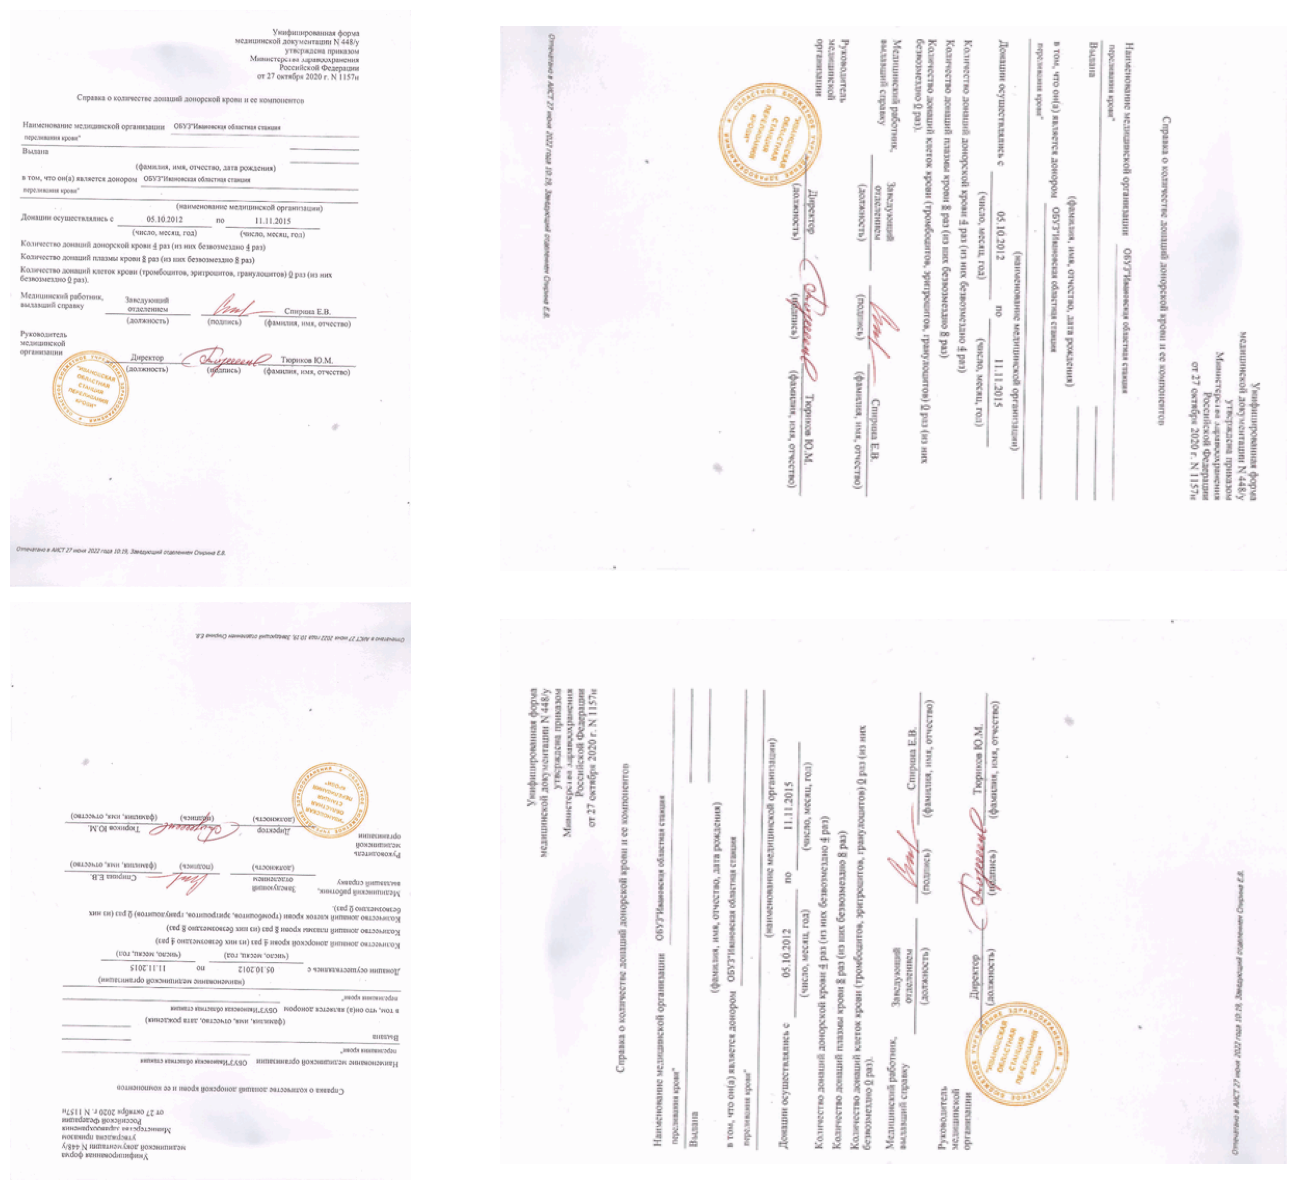

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
for image, ax in zip(image_list, axs.ravel()):
    ax.imshow(image)
    ax.axis('off')
fig.tight_layout()
plt.show()

Получили список с 4 разными ориентациями изображения

## Создаю датасет

In [18]:
common_path = 'images'

original_paths = glob.glob('images/*.png')

original_orientation = pd.DataFrame(data=[os.path.basename(path) for path in original_paths], columns=['name'])

original_orientation['orientation'] = 0

original_orientation_iter= iter(original_orientation['name'])

### Ручная разметка данных 
Размечаю данные вручную и записываю в csv.  
Так как перебор изображений происходит вручную, ячейки этого раздела выполняются столько раз, сколько есть исходных изображений!

Смотрим на изображение и визуально определяем ориентацию исходного изображения

448___6f55af4b7bf54f439f54815867f99fdc.png


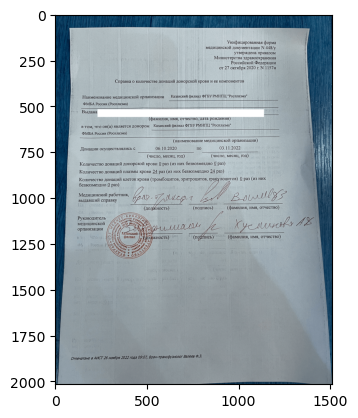

In [19]:
next_img = next(original_orientation_iter, 'STOP')
plt.imshow(cv2.imread(os.path.join(common_path, next_img)));
print(next_img)

В зависимости от ориентации выполняем одну из 4 строк скрипта в ячейке ниже

In [15]:
# original_orientation.loc[(original_orientation['name'] == next_img), 'orientation'] = 0
# original_orientation.loc[(original_orientation['name'] == next_img), 'orientation'] = 90
# original_orientation.loc[(original_orientation['name'] == next_img), 'orientation'] = 180
# original_orientation.loc[(original_orientation['name'] == next_img), 'orientation'] = 270

,name,orientation


## Для исходных изображений создаем дополнительные (разных ориентаций)

Записываем все в csv файл

In [22]:
# original_orientation.to_csv('original_orientation.csv', index=False)

CSV файл создан. Можем перейти к созданию папок с разными ориентациями.

In [20]:
original_orientation = pd.read_csv('original_orientation.csv')

Создаю 4 папки для разных углов поворота

In [24]:
for dirname in angle_list:
    Path(os.path.join('new_images', str(dirname) + '/')).mkdir(parents=True, exist_ok=True)

Создаю изображения с поворотами и сохраняю в папки

In [25]:
for i in range(original_orientation.shape[0]):
    img_path = os.path.join('images', original_orientation.loc[i,'name'])
    image_list = from_path_to_rotations(img_path, angle_list)
    image_angle_list = [(angle + original_orientation.loc[i,'orientation']) % 360 for angle in angle_list]
    for k in range(len(image_angle_list)):
        cv2.imwrite(os.path.join('new_images', 
                                 str(image_angle_list[k]), 
                                 os.path.splitext(original_orientation.loc[i,'name'])[0] + \
                                 '_' + \
                                 str(image_angle_list[k]) + \
                                 os.path.splitext(original_orientation.loc[i,'name'])[1]
                                ), image_list[k])

Изображения готовы.